In [1]:
from src.run import single_run, multi_run, extract_regression_results, set_seed
from src.plots import plot_population_dynamics, log_population_regression, compare_multi_runs, plot_distribution
from src.utils import (
    exponential_lifetime, uniform_sample, gamma_sample,
    cos_sample, fixed_lifetime
)

# Simulation Parameters and Functions

Select the division and lifetime functions to use for the simulation. The following functions are available:
- Exponential
- Uniform
- Gamma
- Cosine
- Fixed

Or you can define your own lambda function to use for division and lifetime.

In [3]:
division_functions = {
    "exponential": lambda x: exponential_lifetime(x, mean_lifetime=5.0),
    "uniform": lambda x: uniform_sample(x, low=1.0, high=10.0),
    "gamma": lambda x: gamma_sample(x, shape=2.0, scale=5.0),
    "cosine": lambda x: cos_sample(x),
    "fixed": lambda x: fixed_lifetime(x, lifetime_constant=10.0),
}

lifetime_functions = {
    "exponential": lambda x: exponential_lifetime(x, mean_lifetime=15.0),
    "uniform": lambda x: uniform_sample(x, low=10.0, high=20.0),
    "gamma": lambda x: gamma_sample(x, shape=2.0, scale=15.0),
    "cosine": lambda x: cos_sample(x),
    "fixed": lambda x: fixed_lifetime(x, lifetime_constant=20.0),
}

division_func = division_functions['exponential']
lifetime_func = lifetime_functions['exponential']

# Single Run

The following code snippet demonstrates how to run a single simulation and visualize the results.

We use log-linear regression to fit the population dynamics and plot the regression results.

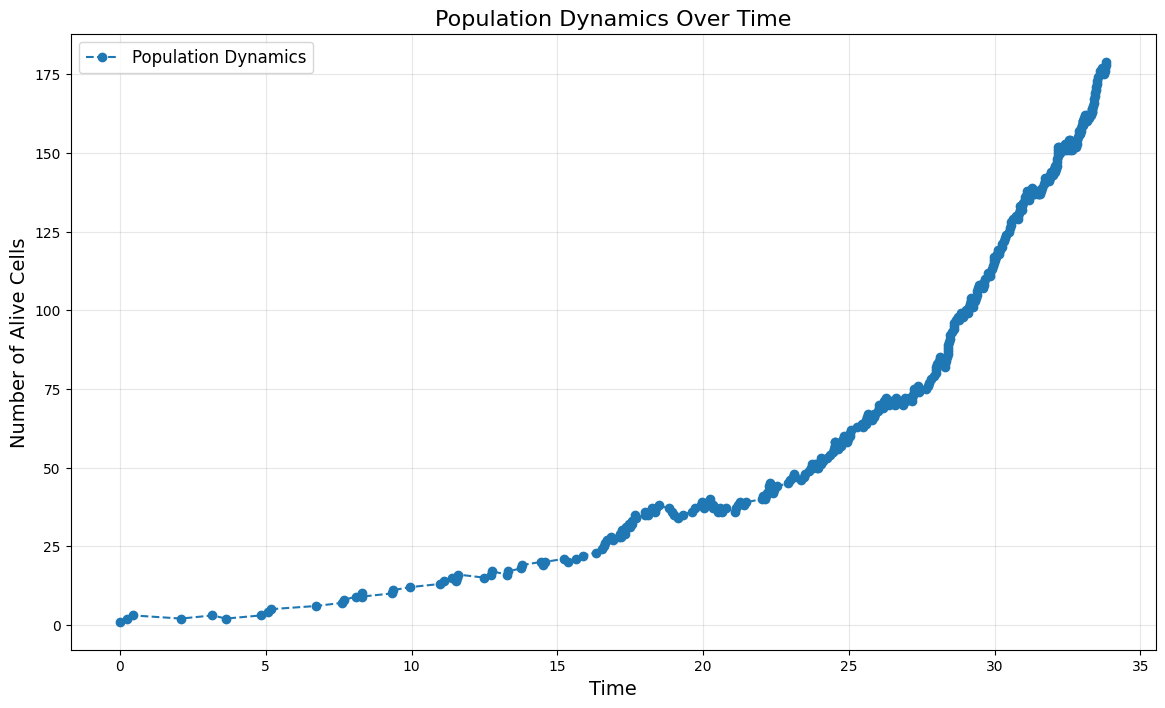

<Figure size 1600x900 with 0 Axes>

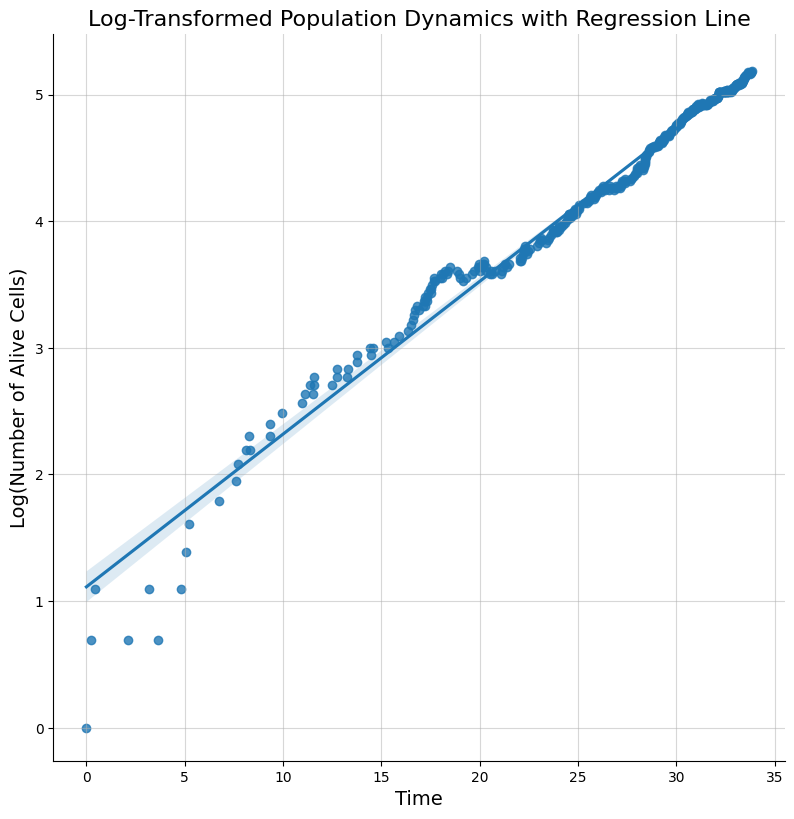

In [4]:
set_seed(41)

# Run a single simulation
sim = single_run(epoch=400, division_func=division_func, lifetime_func=lifetime_func)

# Visualize single simulation
plot_population_dynamics(sim)
log_population_regression(sim)

## Analysis of Single Run

The following code snippet demonstrates how to analyze the results of a single simulation.
We can see that the population dynamics follow a log-linear trend, with the population growing exponentially in the long run.

# Multiple Runs

The following code snippet demonstrates how to run multiple simulations and compare the results.

We see that the trajectories are different for each run, some die out quickly, while others grow exponentially.

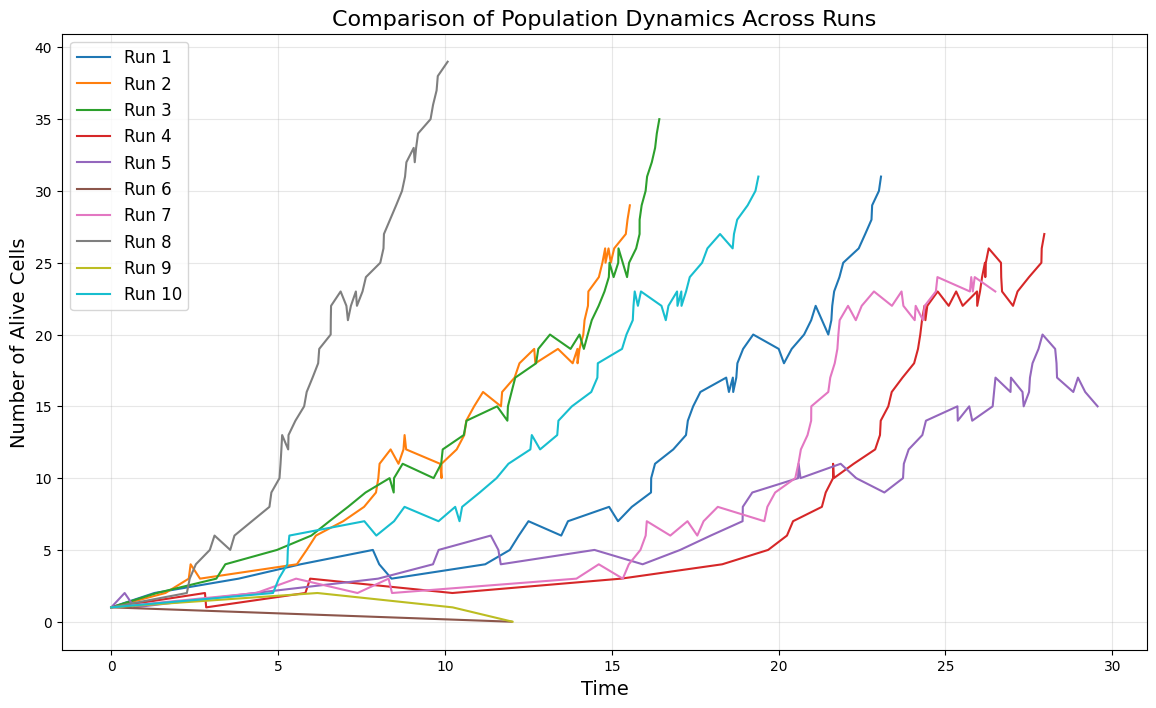

In [9]:
set_seed(50)

# Define division and lifetime functions
division_func = lambda x: exponential_lifetime(x, mean_lifetime=5.0)
lifetime_func = lambda x: exponential_lifetime(x, mean_lifetime=15.0)

# Run multiple simulations
sims = multi_run(epoch=50, num_runs=10, division_func=division_func, lifetime_func=lifetime_func)

# Compare results from multiple runs
compare_multi_runs(sims)

## Analysis of Multiple Runs

The following code snippet demonstrates how to analyze the results of multiple simulations.
One can observe that the population dynamics vary significantly across different runs, with some populations growing rapidly and others dying out quickly.
For different exponential-like trajectories in the long run, the growth rates are different.

# Regression Analysis

The following code snippet demonstrates how to perform regression analysis on the population dynamics.

We extract the regression results from multiple runs and visualize the distributions of regression coefficients and intercepts.


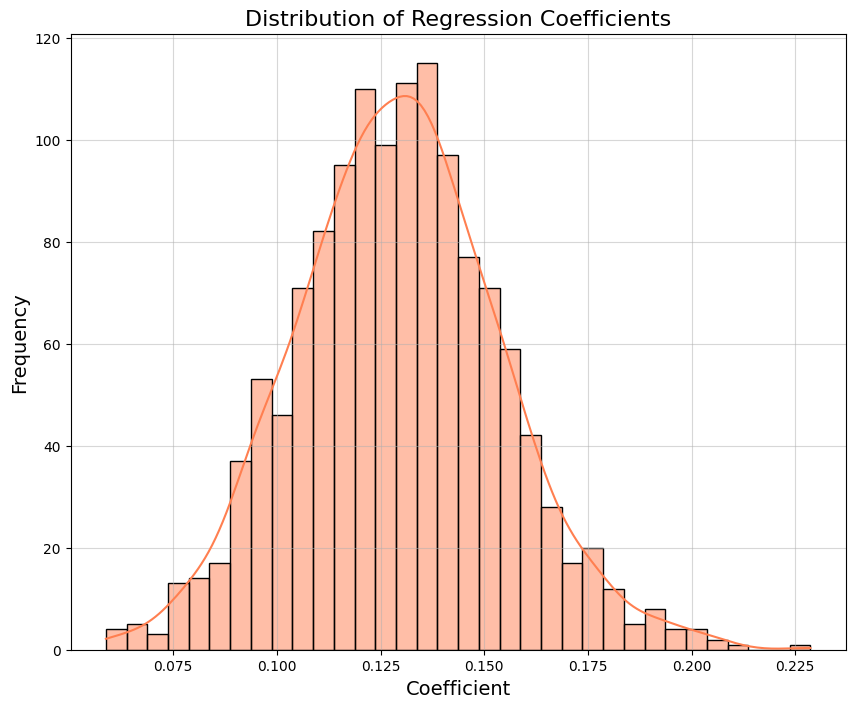

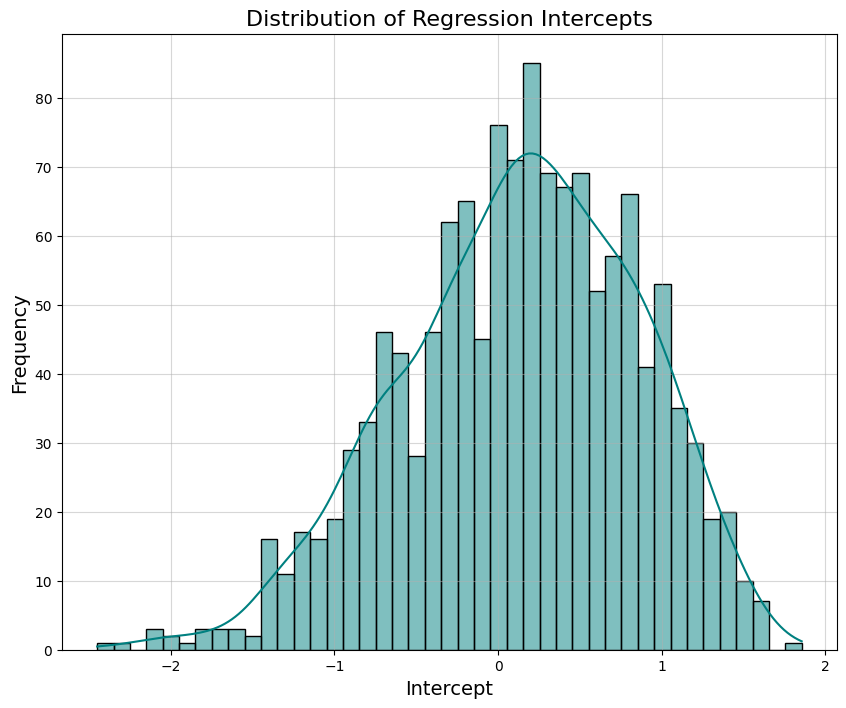

In [15]:
set_seed(50)

# Define division and lifetime functions
division_func = lambda x: exponential_lifetime(x, mean_lifetime=5.0)
lifetime_func = lambda x: exponential_lifetime(x, mean_lifetime=15.0)

# Run multiple simulations
sims = multi_run(epoch=200, num_runs=2000, division_func=division_func, lifetime_func=lifetime_func)

data_independent = extract_regression_results(sims)

# Plot the distributions for coefficients
plot_distribution(data_independent, column='coef', binwidth=0.005, color='coral',
                  xlabel='Coefficient', ylabel='Frequency',
                  title='Distribution of Regression Coefficients')

# Plot the distributions for intercepts
plot_distribution(data_independent, column='intercept', binwidth=0.1, color='teal',
                  xlabel='Intercept', ylabel='Frequency',
                  title='Distribution of Regression Intercepts')

## Regression Analysis

The following code snippet demonstrates how to analyze the regression results from multiple simulations.

We extract the regression coefficients and intercepts from the population dynamics and visualize their distributions.

From the distributions, we can observe that the regression coefficients and intercepts are closed to normally distributed around the true values.